In [2]:
import sys
import xarray as xr
%matplotlib inline

In [3]:
sys.path.insert(0,'.')    # '.' is in the same folder
%load_ext autoreload
%autoreload 1
#  Reload all modules imported with %aimport every time before executing the Python code typed.

%aimport advect_collect_double_field_glorys_data
%aimport plot_functions




In [41]:
advect_collect_double_field_glorys_data.run_experiment()

No. particles is 3
('Start time is ', numpy.datetime64('2016-08-29'))
Output name is /home/students/6252699/thesis/parcels2/output/run_02_07_npart_3_start_2016-08-29_lat_80.0_90.0_simdays_30_AdvectionRK4_ice
Latitude: 78-88
 Longitude: -177-59


INFO: Compiled Sea_Ice_ParticleperiodicBCSample_sitAdvectionRK4_ice ==> /tmp/parcels-26525/ad4b692e71e9830454de579a210767e5.so


Time elapsed = 13.5 s 


'/home/students/6252699/thesis/parcels2/output/run_02_07_npart_3_start_2016-08-29_lat_80.0_90.0_simdays_30_AdvectionRK4_ice'

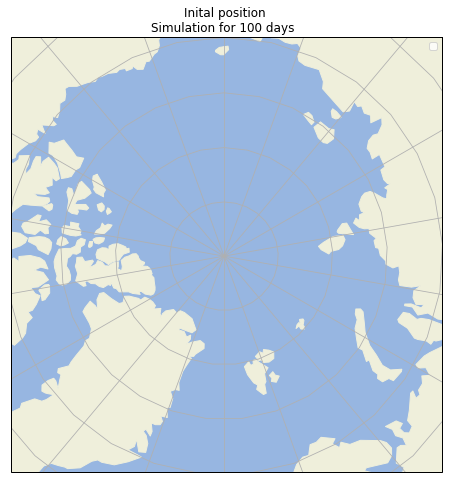

In [42]:
plot_functions.plot_output_scatter(file_dir="/home/students/6252699/thesis/parcels2/output/run_02_07_npart_3_start_2016-08-29_lat_80.0_90.0_simdays_30_AdvectionRK4_ice")

In [48]:
ds = xr.open_dataset("/home/students/6252699/thesis/parcels2/output/run_02_07_npart_3_start_2016-08-29_lat_80.0_90.0_simdays_30_AdvectionRK4_ice.nc", decode_times=False).load()

ds.lon.values

array([[84.31, 84.31,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06,
        88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06, 88.06,
        88.06, 88.06, 88.06],
       [78.29, 78.29,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan]], dtype=float32)

In [55]:
import glob
import dask
data_dir  = "/scratch/AnnekeV/reanalysis_data/" + "GLOBAL_REANALYSIS_PHY_001_030-TDS_201608*_uv_uvice_con_thick.nc" #Directory for nemo data dwonladed
ifiles    = sorted(glob.glob(data_dir))

xr.open_mfdataset(ifiles)

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 4320, time: 31)
Coordinates:
  * depth      (depth) float32 0.494025
  * latitude   (latitude) float32 50.0 50.083332 50.166668 ... 89.916664 90.0
  * longitude  (longitude) float32 -180.0 -179.91667 ... 179.83333 179.91667
  * time       (time) datetime64[ns] 2016-08-01T12:00:00 ... 2016-08-31T12:00:00
Data variables:
    siconc     (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    vo         (time, depth, latitude, longitude) float32 0.015259255 ... nan
    uo         (time, depth, latitude, longitude) float32 0.09460738 ... nan
    usi        (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
    sithick    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    vsi        (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan
Attributes:
    title:                              daily mean fields from Global Ocean P...
    easting:                            longit

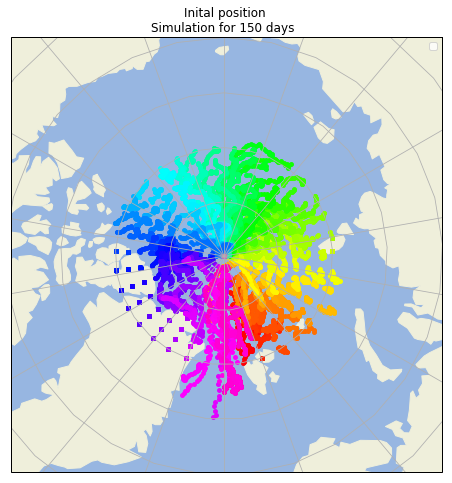

In [28]:
plot_functions.plot_output_scatter(file_dir = "/home/students/6252699/thesis/parcels2/output/run_01_29_npart_360_start_2001-08-01_lat_80.0_90.0_simdays_150_AdvectionRK4_ocean")

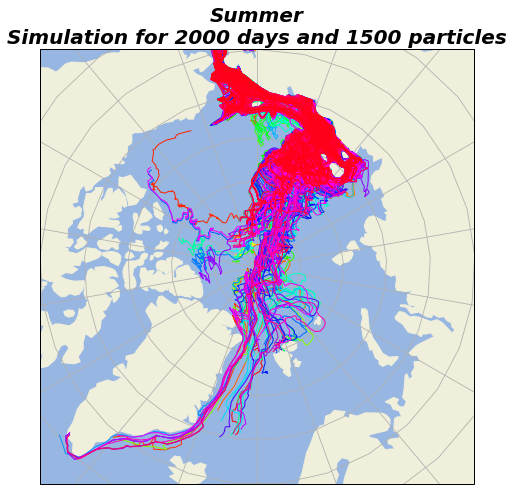

In [7]:
%matplotlib inline
datadir = "/scratch/AnnekeV/output/"
fname_summer   = "run_02_07_bering_npart_1500_start_2001-08-01_lat_66.0_66.5_simdays_2000_AdvectionRK4_ice"
plot_functions.plot_trajectory_map(datadir + fname, y_extent=65, extra_title="Summer")




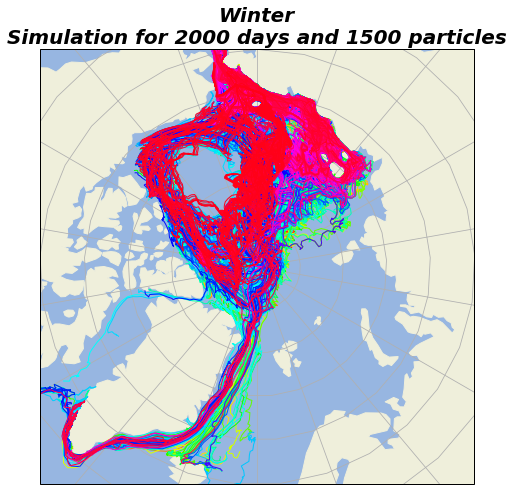

In [10]:

fname_winter   = "run_02_09_bering_npart_1500_start_2001-02-01_lat_66.0_66.5_simdays_2000_AdvectionRK4_ice"
plot_functions.plot_trajectory_map(datadir + fname_winter, y_extent=65, extra_title="Winter")


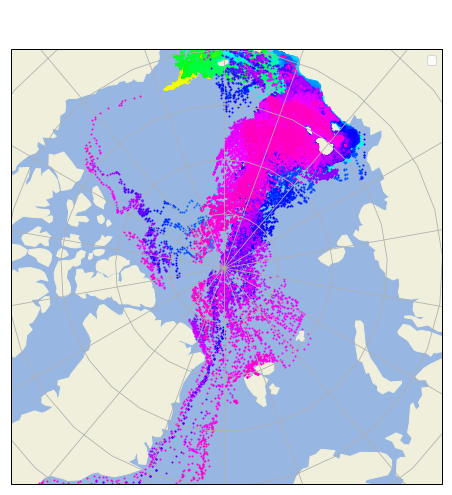

In [7]:
%time plot_functions.plot_output_scatter(datadir + fname, satellite_height= 2e8)

CPU times: user 15 s, sys: 110 ms, total: 15.1 s
Wall time: 1.33 s


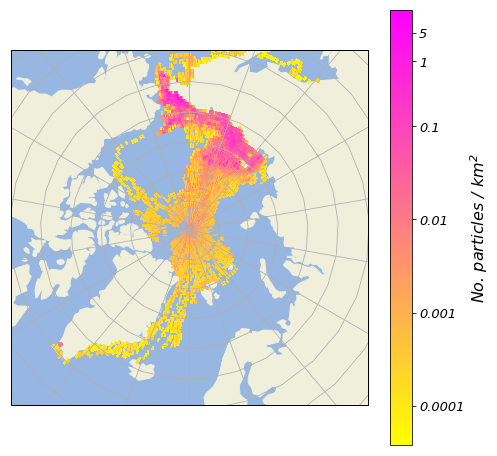

In [9]:
%time plot_functions.plot_histogram(datadir + fname, y_extent=60, res = 0.5)

CPU times: user 13.3 s, sys: 125 ms, total: 13.4 s
Wall time: 1.17 s


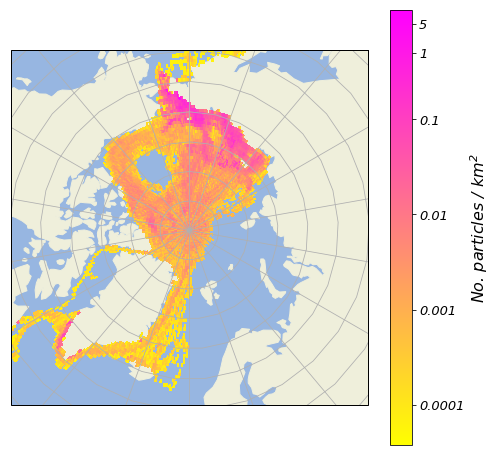

In [11]:
%time plot_functions.plot_histogram(datadir + fname_winter, y_extent=60, res = 0.5)

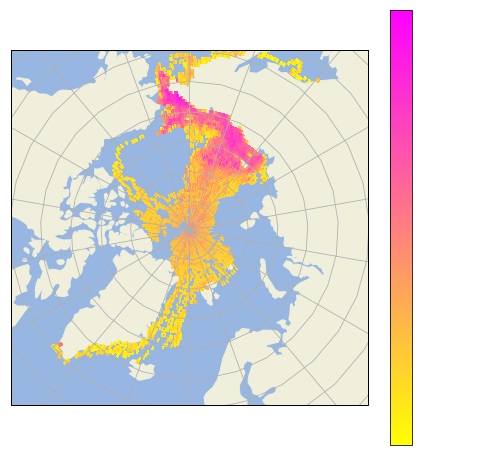

In [102]:
import netCDF4 as netcdf
from functions.grid_to_km import area
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

file_dir= datadir + fname; y_extent = 60; res =0.5
'''plot a histogram, res is resolution of the pcolormesh, histogram'''

'''Import data'''
test = netcdf.Dataset(file_dir + ".nc")
lat = test['lat'][:,:]
lon  = test['lon'][:,:]
test.close()

H, xedges, yedges = np.histogram2d(lon.flatten(), lat.flatten(), bins=(np.arange(0,360,res),np.arange(30,90,res)))

X, Y     = np.meshgrid(xedges, yedges)
lat_area = area((Y[:-1,:-1]+Y[1:,1:])/2., res)/1e6
H        = H.T
H        = H/lat_area # Let each row list bins with common y range.

plt.figure(figsize = [8,8])
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.gridlines(xlocs = np.arange(-180,185,20), ylocs = np.arange(-90, 95,5))
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([-180,180,y_extent,90],  ccrs.PlateCarree())

vmin, vmax = 1./np.max(lat_area), np.max(H)


im = ax.pcolormesh(X, Y, H, transform = ccrs.PlateCarree(), 
                   norm = mpl.colors.LogNorm(vmin=1/np.max(lat_area),vmax=np.max(H)), 
#                    vmin = vmin,
#                    vmax = vmax,
                   cmap = 'spring_r'
                  )
cbar = ax.figure.colorbar(im)
ticks = [1e-4,1e-3,1e-2,0.1, 1, 5, 10]
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticks)
cbar.set_label(r"No. particles / $km^2$")

plt.show()


In [73]:
mean_lat = (Y[:-1,:-1]+Y[1:,1:])/2.
print(mean_lat)
Y.astype(float)


[[30.5 30.5 30.5 ... 30.5 30.5 30.5]
 [31.5 31.5 31.5 ... 31.5 31.5 31.5]
 [32.5 32.5 32.5 ... 32.5 32.5 32.5]
 ...
 [86.5 86.5 86.5 ... 86.5 86.5 86.5]
 [87.5 87.5 87.5 ... 87.5 87.5 87.5]
 [88.5 88.5 88.5 ... 88.5 88.5 88.5]]


array([[30., 30., 30., ..., 30., 30., 30.],
       [31., 31., 31., ..., 31., 31., 31.],
       [32., 32., 32., ..., 32., 32., 32.],
       ...,
       [87., 87., 87., ..., 87., 87., 87.],
       [88., 88., 88., ..., 88., 88., 88.],
       [89., 89., 89., ..., 89., 89., 89.]])